In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

print("Modules Loaded Successfully!")

Modules Loaded Successfully!


In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('diamonds.csv')

print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


In [4]:
df.shape

(53940, 10)

In [5]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
df.apply(lambda x: len(x.unique()))

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [10]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [11]:
df.duplicated().sum()

146

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## EDA

<AxesSubplot:xlabel='carat', ylabel='Count'>

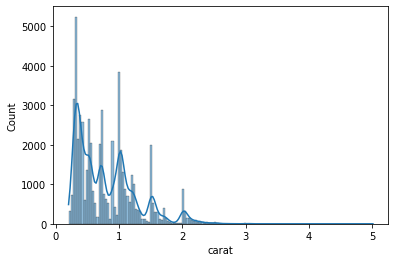

In [14]:
sns.histplot(df.carat, kde=True)

<AxesSubplot:xlabel='cut', ylabel='count'>

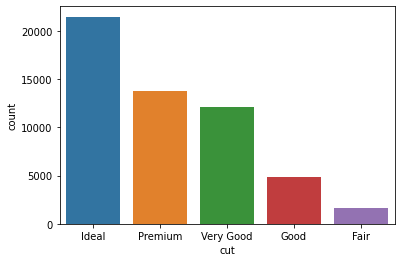

In [15]:
sns.countplot(df.cut, order=df.cut.value_counts().index)

<AxesSubplot:xlabel='color', ylabel='count'>

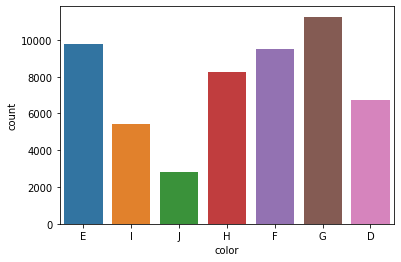

In [16]:
sns.countplot(df.color)

<AxesSubplot:xlabel='clarity', ylabel='count'>

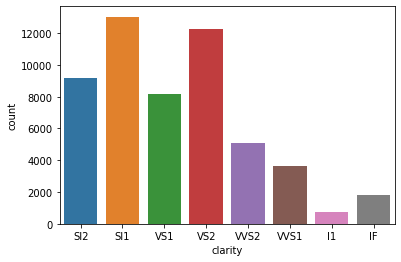

In [17]:
sns.countplot(df.clarity)

<AxesSubplot:xlabel='depth', ylabel='Count'>

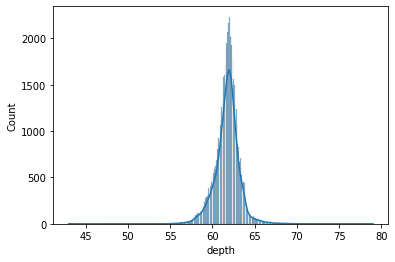

In [18]:
sns.histplot(df.depth, kde=True)

<AxesSubplot:xlabel='table', ylabel='Count'>

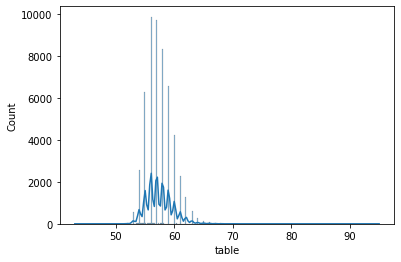

In [19]:
sns.histplot(df.table, kde=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

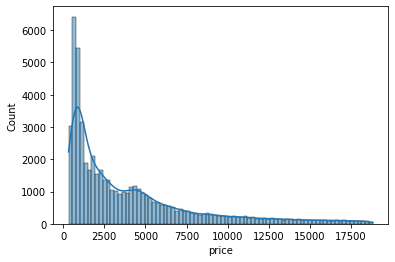

In [20]:
sns.histplot(df.price, kde=True)

## Pre-Processing

In [21]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [22]:
le = LabelEncoder()
sc = StandardScaler()

In [23]:
df["cut"]=le.fit_transform(df["cut"].astype('str'))
df["color"]=le.fit_transform(df["color"].astype('str'))
df["clarity"]=le.fit_transform(df["clarity"].astype('str'))

In [24]:
X = df.drop('price', axis=1)
y = df['price']

In [25]:
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
X_train['carat'] = sc.fit_transform(X_train[['carat']])
X_test['carat'] = sc.transform(X_test[['carat']])
X_train['depth'] = sc.fit_transform(X_train[['depth']])
X_test['depth'] = sc.transform(X_test[['depth']])
X_train['table'] = sc.fit_transform(X_train[['table']])
X_test['table'] = sc.transform(X_test[['table']])
X_train['x'] = sc.fit_transform(X_train[['x']])
X_test['x'] = sc.transform(X_test[['x']])
X_train['y'] = sc.fit_transform(X_train[['y']])
X_test['y'] = sc.transform(X_test[['y']])
X_train['z'] = sc.fit_transform(X_train[['z']])
X_test['z'] = sc.transform(X_test[['z']])

In [27]:
class KNN:
    def __init__(self,k):
        self.k=k
        
    def fit(self,X,y):
        self.X=np.asarray(X)
        self.y=np.asarray(y)
        
    def predict(self,X):
        X=np.asarray(X)
        result=[]
        for x in X:
            dis=np.sqrt(np.sum((x-self.X)**2,axis=1))
            index=dis.argsort()
            index=index[:self.k]
            result.append(np.mean(self.y[index]))
        return np.array(result)

In [28]:
model = KNN(k=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [29]:
print('Root Mean Squared Error: ',round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("R2 Score: ",round(r2_score(y_test, y_pred)*100, 2))

Root Mean Squared Error:  757.21
R2 Score:  96.27


In [30]:
sknn = KNeighborsRegressor()
sknn.fit(X_train, y_train)
y_pred = sknn.predict(X_test)

In [31]:
print('Root Mean Squared Error: ',round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("R2 Score: ",round(r2_score(y_test, y_pred)*100, 2))

Root Mean Squared Error:  730.61
R2 Score:  96.53
